In [33]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy import sparse 
import matplotlib.pyplot as plt
import torch

In [34]:
scClass_path = !cd ../..;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass
from scClass.main import Model

## Data Collection

In [35]:
data_name = 'Placenta'
adata = sc.read_h5ad(f'../../../dataset/{data_name}.h5ad')

In [36]:
# for cell in ['granulocyte','lymphocyte','macrophage']:
#     adata.obs['modelA id'][adata.obs['origin cell type']==cell] = -2
#     adata.obs['modelC id'][adata.obs['origin cell type']==cell] = -2

In [37]:
#  adata.write_h5ad(f'../../../dataset/{data_name}.h5ad')

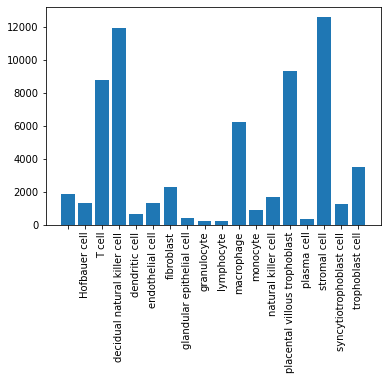

array(['', 'Hofbauer cell', 'T cell', 'decidual natural killer cell',
       'dendritic cell', 'endothelial cell', 'fibroblast',
       'glandular epithelial cell', 'granulocyte', 'lymphocyte',
       'macrophage', 'monocyte', 'natural killer cell',
       'placental villous trophoblast', 'plasma cell', 'stromal cell',
       'syncytiotrophoblast cell', 'trophoblast cell'], dtype=object)

In [38]:
# plot cell type distribution
x,y = np.unique(adata.obs['origin cell type'],return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()
label_y=x; label_y

## Dataset Preprocessing

In [39]:
# get gene on model
gene = ('EN'+adata.var['gene_id'])
adata = scClass.transmodel(adata,gene=gene,gene_ref='ensembl_ids')

get gene seq...
0% 15% 31% 47% 63% 78% 94% 
Of 31744 genes in the input file, 28461 were found in the training set of 45468 genes.
mapping to model...
0% 82% 

In [40]:
# Normalized
adata = scClass.normalize_simple(adata)

## Classifier

In [41]:
model = scClass.load()

loading model from:  /home/shhsu/download/scClass_docker/scClass/scClass_modelA/scClass/data/model_train.pkl


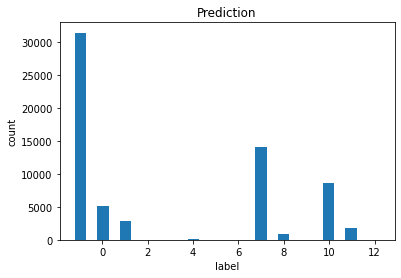

In [42]:
y_pred = scClass.predict_batch(adata,model)

In [43]:
scClass.save_predict(y_pred)

label stored in: './output/cell_type_20220307_194605.csv'


## Compare

In [44]:
df = pd.read_excel("../../../dataset/preprocessing/Supplementary table.xlsx", sheet_name=data_name, na_filter=False)
trans_table = df[['origin cell type','modelA id']].values.astype(str)
trans_table

array([['', '-1'],
       ['Hofbauer cell', '-1'],
       ['T cell', '0'],
       ['decidual natural killer cell', '7'],
       ['dendritic cell', '11'],
       ['endothelial cell', '-1'],
       ['fibroblast', '-1'],
       ['glandular epithelial cell', '-1'],
       ['granulocyte', '-1'],
       ['lymphocyte', '-2'],
       ['macrophage', '-2'],
       ['monocyte', '-2'],
       ['natural killer cell', '7'],
       ['placental villous trophoblast', '-1'],
       ['plasma cell', '4'],
       ['stromal cell', '-1'],
       ['syncytiotrophoblast cell', '-1'],
       ['trophoblast cell', '-1']], dtype='<U29')

In [46]:
label = adata.obs['modelA id']
anno = adata.obs['origin cell type']

,label
-1,unknown
0,T-helper cell
1,cytotoxic T cell
2,memory B cell
3,naive B cell
4,plasma cell
5,precursor B cell
6,pro-B cell
7,natural killer cell
8,erythrocyte

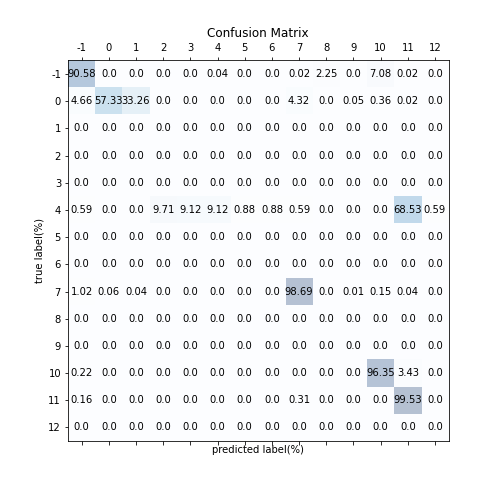

In [47]:
fig = scClass.confusion_matrix(y_pred=y_pred,y_true=label,_filter=False)
scClass.figure_html(fig)

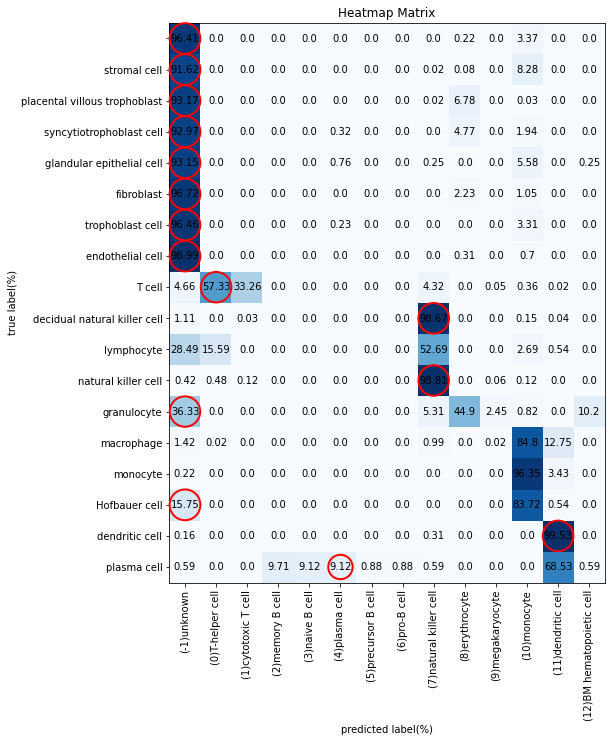

In [49]:
scClass.heatmap_matrix(y_pred=y_pred,y_true=anno,table=trans_table)

In [50]:
scClass.plot_performance(y_pred=y_pred,y_true=label)

,Performance,Value
0,accuary,0.871665
1,precision,0.752659
2,recall,0.764263
3,f1-score,0.673868
